In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
# import seaborn and matplotlib for charting and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#import plotly and cufflinks for interactive visualisations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# To import csv file containing fundamental data downloaded from S&P Capital IQ, as well as other features and the labels for machine learning.
stockdata = pd.read_csv('cleaned stockdata.csv', index_col=0)

In [5]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2949
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2839 non-null   object 
 1   longName                        2839 non-null   object 
 2   Name                            2839 non-null   object 
 3   IPO Year                        1088 non-null   float64
 4   Sector                          2674 non-null   object 
 5   Effective annual return         2839 non-null   float64
 6   CIQ ID                          2839 non-null   object 
 7   Ticker                          2730 non-null   object 
 8   Country.1                       2839 non-null   object 
 9   Short Business Description      2831 non-null   object 
 10  IQ_TOTAL_REV                    2839 non-null   float64
 11  IQ_RETURN_ASSETS                2839 non-null   float64
 12  IQ_RETURN_EQUITY                28

Fundamental data were downloaded from Capital IQ to be used as features to predict effective annual return (from 4-Jan-2010 to 2-Jan-2020). These fundamental data are for financial year ending 2009 updated as at 01-Apr-2023 (date of retrieval of data), and are in USD (for monetary figures - using historical exchange rates) or % (for ratios). <br> <br>
The fundamental data (29 metrics in total) obtained from Capital IQ have the following definitions: <br>
**IQ_TOTAL_REV**: Revenues + Other Revenues, Total	<br>
**IQ_RETURN_ASSETS**: EBIT * (1-0.375) / Average Total Assets	<br>
**IQ_RETURN_EQUITY**:	Earnings from Continuing Operations / Average Total Equity<br>
**IQ_GROSS_MARGIN**: Gross Profit / Total Revenues <br>
**IQ_EBITDA_MARGIN**: EBITDA / Total Revenues	<br>
**IQ_NI_MARGIN**: Net Income / Total Revenues	<br>
**IQ_AUDITOR_OPINION**: Auditor Opinion	<br>
**IQ_ASSET_TURNS**: Total Revenues / Average Total Assets	<br>
**IQ_CURRENT_RATIO**: Total Current Assets / Total Current Liabilities	<br>
**IQ_DAYS_SALES_OUT**: Average Accounts Receivable / Revenues * 360	<br>
**IQ_DAYS_INVENTORY_OUT**: Average Inventory / Cost of Goods Sold * 360	<br>
**IQ_DAYS_PAYABLE_OUT**: Average Accounts Payable / (Cost of Goods Sold - Beginning Inventory + Ending Inventory) * Number of Days in the Period	<br>
**IQ_TOTAL_DEBT_EQUITY**: Total Debt / Total Equity	<br>
**IQ_TOTAL_REV_1YR_ANN_GROWTH**: Total Revenues (t) / Total Revenues (t-1) - 1	<br>
**IQ_NI_1YR_ANN_GROWTH**: Net Income (t) / Net Income (t-1) -1	<br>
**IQ_CFO_1YR_ANN_GROWTH**: Cash from Operations (t) / Cash from Operations (t-1) -1	<br>
**IQ_TOTAL_ASSETS_1YR_ANN_GROWTH**: Total Assets (t) / Total Assets (t-1) -1	<br>
**IQ_EBITDA**: EBITDA	<br>
**IQ_PAYOUT_RATIO**: (Common Dividends Paid + Preferred Dividends Paid) / Net Income	<br>
**IQ_CASH_ST_INVEST**: Cash and Equivalents + Short Term Investments + Trading Asset Securities	<br>
**IQ_NPPE**: Gross Property Plant and Equipment + Accumulated Depreciation	<br>
**IQ_GW**: Goodwill	<br>
**IQ_RE**: Retained Earnings	<br>
**IQ_TBV**: Book Value of Common Equity - Goodwill = Other Intangibles - Fin. Div. Goodwill - Fin. Div. Other Intangibles	<br>
**IQ_NET_DEBT**: Total Debt - Total Cash and Short Term Investments - Long Term Marketable Securities	<br>
**IQ_CONTINGENT_LIABILITIES**: Contingent Liabilites <br>
**IQ_CASH_OPER**: Cash from Operations <br>
**IQ_CASH_INVEST**: Cash from Investing <br>
**IQ_NET_CHANGE**: Cash from Operations + Cash from Investing + Cash from Financing + Foreign Exchange Rate Adjustments + Misc. Cash Flow Adjustments

In [6]:
stockdata.nunique()

Symbol                            2839
longName                          2839
Name                              2838
IPO Year                            59
Sector                              12
Effective annual return           2839
CIQ ID                            2839
Ticker                            2730
Country.1                           48
Short Business Description        2831
IQ_TOTAL_REV                      2552
IQ_RETURN_ASSETS                  2545
IQ_RETURN_EQUITY                  2483
IQ_GROSS_MARGIN                   1984
IQ_EBITDA_MARGIN                  2209
IQ_NI_MARGIN                      2441
IQ_AUDITOR_OPINION                   5
IQ_ASSET_TURNS                    2280
IQ_CURRENT_RATIO                  2378
IQ_DAYS_SALES_OUT                 1863
IQ_DAYS_INVENTORY_OUT             1416
IQ_DAYS_PAYABLE_OUT               1848
IQ_TOTAL_DEBT_EQUITY              1826
IQ_TOTAL_REV_1YR_ANN_GROWTH       2480
IQ_NI_1YR_ANN_GROWTH              1320
IQ_CFO_1YR_ANN_GROWTH    

<AxesSubplot:>

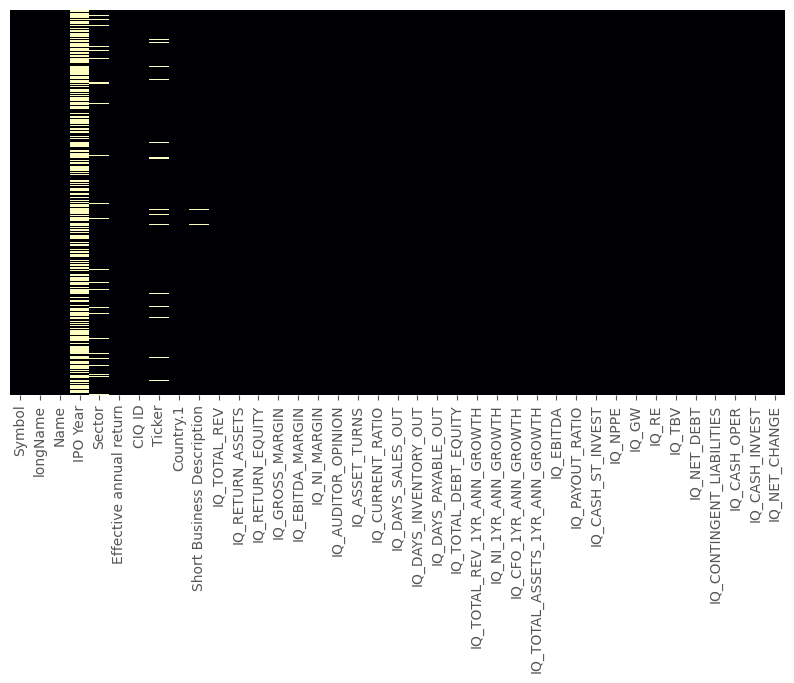

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(stockdata.isnull(),yticklabels=False,cbar=False,cmap='magma')

We will not be including IPO Year in our machine learning models as there are 1,751 null values out of 2,839.

In [5]:
stockdata=pd.get_dummies(data=stockdata, columns=['Sector', 'Country.1','IQ_AUDITOR_OPINION'], drop_first=True, dummy_na=True).drop(['Country.1_nan','IQ_AUDITOR_OPINION_nan'],axis=1)

In [9]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2949
Data columns (total 99 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Symbol                                                   2839 non-null   object 
 1   longName                                                 2839 non-null   object 
 2   Name                                                     2839 non-null   object 
 3   IPO Year                                                 1088 non-null   float64
 4   Effective annual return                                  2839 non-null   float64
 5   CIQ ID                                                   2839 non-null   object 
 6   Ticker                                                   2730 non-null   object 
 7   Short Business Description                               2831 non-null   object 
 8   IQ_TOTAL_REV                

# Linear regression model

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description'],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [13]:
coefficients = pd.DataFrame(lm.coef_,stockdata.drop(['Symbol','longName','Name','IPO Year','Effective annual return','CIQ ID', 'Ticker', 'Short Business Description'],axis=1).columns,columns=['Coefficient'])

In [14]:
coefficients

,Coefficient
IQ_TOTAL_REV,0.005771
IQ_RETURN_ASSETS,0.001636
IQ_RETURN_EQUITY,-0.002289
IQ_GROSS_MARGIN,0.000568
IQ_EBITDA_MARGIN,0.004467
...,...
Country.1_Uruguay,0.006732
IQ_AUDITOR_OPINION_Qualified,0.003754
IQ_AUDITOR_OPINION_Unqualified,0.041572
IQ_AUDITOR_OPINION_Unqualified Going Concern,-0.006604


In [15]:
coefficients['Coefficient'].iplot()

In [16]:
coefficients.loc['Country.1_Bahamas']

Coefficient   -1.523682e+11
Name: Country.1_Bahamas, dtype: float64

We observe that the coeffcient for Country.1_Bahamas is approx. -152 billion while the other coefficients are close to 0. This seems arbitrary given that only one stock was from the Bahamas.

In [17]:
stockdata[stockdata['Country.1_Bahamas']==1]

,Symbol,longName,Name,IPO Year,Effective annual return,CIQ ID,Ticker,Short Business Description,IQ_TOTAL_REV,IQ_RETURN_ASSETS,...,Country.1_Thailand,Country.1_Trinidad & Tobago,Country.1_Turkey,Country.1_United Kingdom,Country.1_United States,Country.1_Uruguay,IQ_AUDITOR_OPINION_Qualified,IQ_AUDITOR_OPINION_Unqualified,IQ_AUDITOR_OPINION_Unqualified Going Concern,IQ_AUDITOR_OPINION_Unqualified with Additional Language
1967,NYMX,Nymox Pharmaceutical Corporation,Nymox Pharmaceutical Corporation Common Stock ...,NaN,-0.062274,IQ389645,NasdaqCM:NYMX,"Nymox Pharmaceutical Corporation, a biopharmac...",0.41598,-348.1155,...,0,0,0,0,0,0,0,0,0,1


__Predictions__

In [18]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

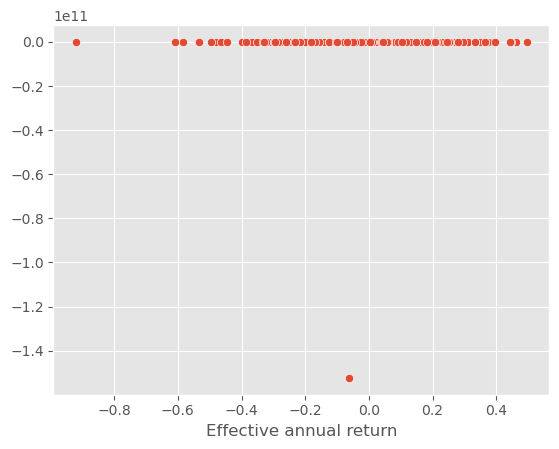

In [19]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

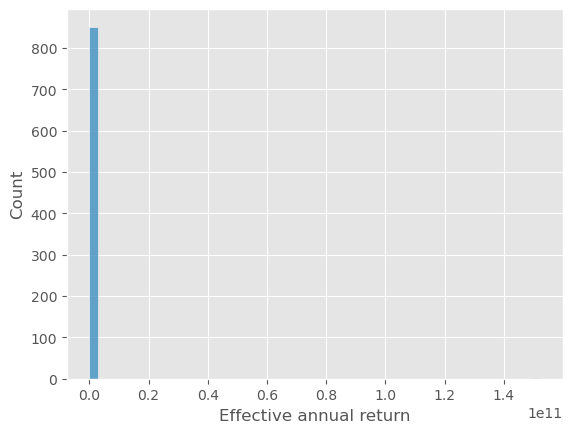

In [20]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

**Regression Evaluation Metrics/Loss Functions**


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 178836209.4631594
MSE: 2.7248911890924892e+19
RMSE: 5220049031.46751


In [22]:
y_test.mean()

0.06442245133568081

# Feature selection

The loss functions are extremely large compared to the mean of y_test, meaning the model did not perform well. This might be due to multicollinearity as the features might be correlated with one another and are not independent of one another. For example, in Part 3 we saw that total revenue has high linear correlation with net property, plant and equipment, retained earnings and tangible book value. <br>

We will reduce the number of features in the machine learning model in order to achieve better results.

Given that 2,394 stocks out of 2,839 stocks are from the United States, we will remove the dummy variables for Country.1 except for Country.1_United States from the machine learning model.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [25]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [26]:
coefficients = pd.DataFrame(lm.coef_,pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns,columns=['Coefficient'])

In [27]:
coefficients

,Coefficient
IQ_TOTAL_REV,0.007606
IQ_RETURN_ASSETS,0.001320
IQ_RETURN_EQUITY,-0.002582
IQ_GROSS_MARGIN,0.000991
IQ_EBITDA_MARGIN,0.004284
IQ_NI_MARGIN,-0.003562
IQ_ASSET_TURNS,0.021858
IQ_CURRENT_RATIO,-0.002484
IQ_DAYS_SALES_OUT,0.006294
IQ_DAYS_INVENTORY_OUT,0.011702


In [28]:
coefficients['Coefficient'].iplot()

In [29]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

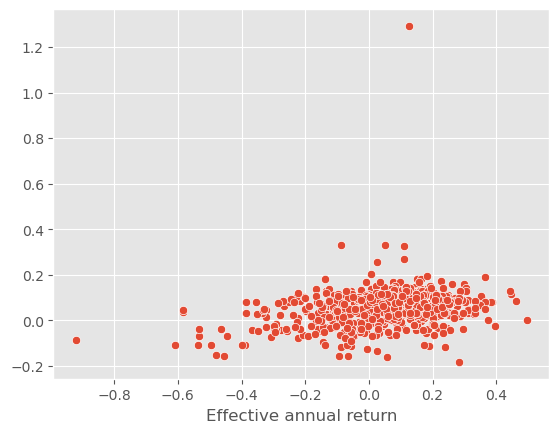

In [30]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

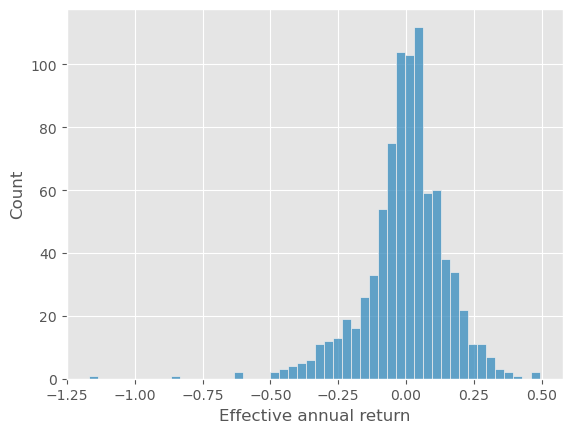

In [31]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1086947843392503
MSE: 0.0236016783797678
RMSE: 0.15362837752110708


The loss functions have reduced substantially. We will continue by using a feature selection method, recursive feature elimination, to improve model performance and further reduce overfitting.

**Recursive Feature Elimination**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [35]:
# Half of the features will be selected by default, by eliminating the least important feature by coef_ after recursively training.
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=LinearRegression(), step = 1)
rfe_selector.fit(scaled_features, y_train)
pd.DataFrame(scaled_features,columns=pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns).columns[rfe_selector.get_support()]

Index(['IQ_TOTAL_REV', 'IQ_ASSET_TURNS', 'IQ_DAYS_SALES_OUT',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_EBITDA', 'IQ_CASH_ST_INVEST', 'IQ_GW',
       'IQ_TBV', 'IQ_CASH_OPER', 'IQ_CASH_INVEST',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Industrials',
       'Sector_Real Estate', 'Sector_Technology', 'Sector_Utilities',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],
      dtype='object')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_TOTAL_REV', 'IQ_ASSET_TURNS', 'IQ_DAYS_SALES_OUT',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_EBITDA', 'IQ_CASH_ST_INVEST', 'IQ_GW',
       'IQ_TBV', 'IQ_CASH_OPER', 'IQ_CASH_INVEST',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Industrials',
       'Sector_Real Estate', 'Sector_Technology', 'Sector_Utilities',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [38]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [39]:
coefficients = pd.DataFrame(lm.coef_,['IQ_TOTAL_REV', 'IQ_ASSET_TURNS', 'IQ_DAYS_SALES_OUT',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_EBITDA', 'IQ_CASH_ST_INVEST', 'IQ_GW',
       'IQ_TBV', 'IQ_CASH_OPER', 'IQ_CASH_INVEST',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Industrials',
       'Sector_Real Estate', 'Sector_Technology', 'Sector_Utilities',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],columns=['Coefficient'])

In [40]:
coefficients

,Coefficient
IQ_TOTAL_REV,0.006459
IQ_ASSET_TURNS,0.021675
IQ_DAYS_SALES_OUT,0.006222
IQ_DAYS_INVENTORY_OUT,0.011248
IQ_EBITDA,0.025987
IQ_CASH_ST_INVEST,-0.008433
IQ_GW,0.006561
IQ_TBV,-0.003926
IQ_CASH_OPER,-0.021871
IQ_CASH_INVEST,-0.005171


In [41]:
coefficients['Coefficient'].iplot()

In [42]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

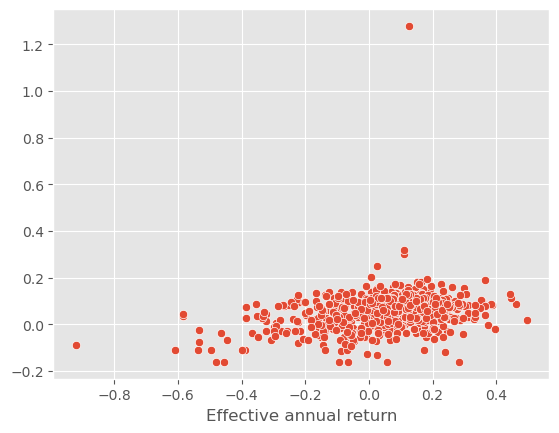

In [43]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

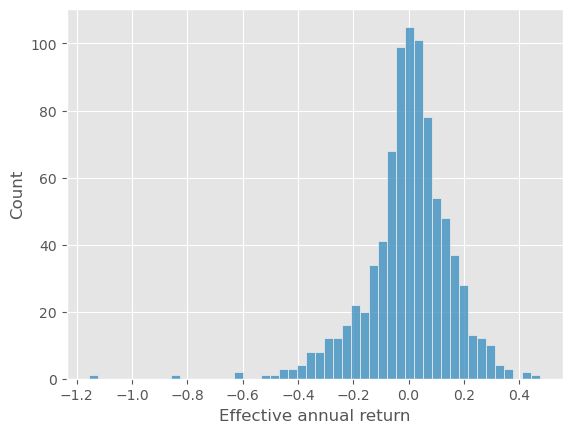

In [44]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10836509782350566
MSE: 0.02334521170497263
RMSE: 0.1527913993161023


In [46]:
y_test.mean()

0.06442245133568081

Loss functions have only reduced slightly. However, the RMSE is still approx. 240% of the mean of y_test, which shows that the model still has a relatively large error.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [49]:
# To specify to only retain 10 features.
from sklearn.feature_selection import RFE

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select = 10, step = 1)
rfe_selector.fit(scaled_features, y_train)
pd.DataFrame(scaled_features,columns=pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns).columns[rfe_selector.get_support()]

Index(['IQ_ASSET_TURNS', 'IQ_EBITDA', 'IQ_CASH_OPER',
       'Sector_Consumer Discretionary', 'Sector_Finance', 'Sector_Real Estate',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],
      dtype='object')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_ASSET_TURNS', 'IQ_EBITDA', 'IQ_CASH_OPER',
       'Sector_Consumer Discretionary', 'Sector_Finance', 'Sector_Real Estate',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [52]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [53]:
coefficients = pd.DataFrame(lm.coef_,['IQ_ASSET_TURNS', 'IQ_EBITDA', 'IQ_CASH_OPER',
       'Sector_Consumer Discretionary', 'Sector_Finance', 'Sector_Real Estate',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],columns=['Coefficient'])

In [54]:
coefficients

,Coefficient
IQ_ASSET_TURNS,0.023949
IQ_EBITDA,0.032813
IQ_CASH_OPER,-0.029734
Sector_Consumer Discretionary,0.022838
Sector_Finance,0.053089
Sector_Real Estate,0.018628
Sector_Technology,0.017538
Sector_Utilities,0.018095
IQ_AUDITOR_OPINION_Unqualified,0.052742
IQ_AUDITOR_OPINION_Unqualified with Additional Language,0.056683


In [55]:
coefficients['Coefficient'].iplot()

In [56]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

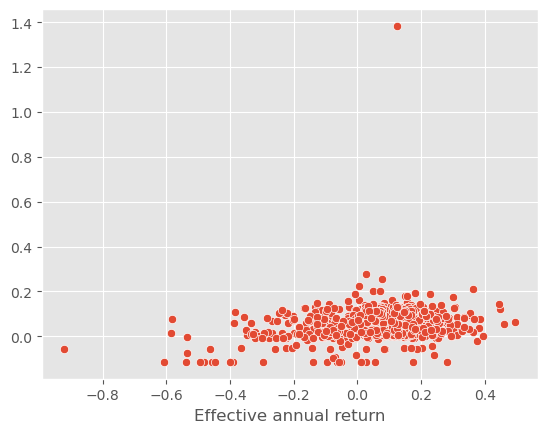

In [57]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

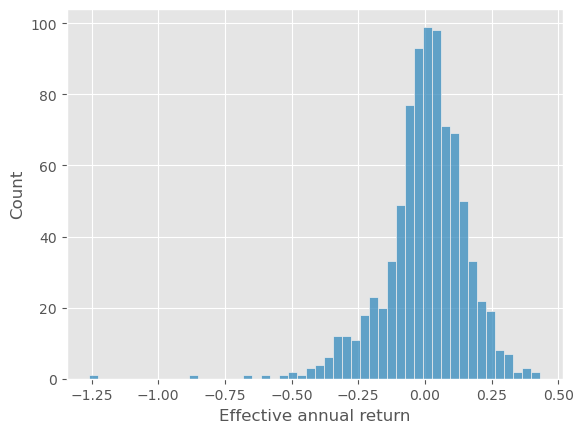

In [58]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11204008999456712
MSE: 0.02438539248629202
RMSE: 0.15615822900600537


In [60]:
y_test.mean()

0.06442245133568081

Loss functions have actually increased with 10 features selected compared to 22 features selected using recursive feature elimination. 

**Variance Threshold**

Variance threshold feature selection only uses the features and does not consider information from the label (effective annual return), which limits its usefulness in supervised machine learning.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [127]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [128]:
# To set variance threshold of 1.
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(1)
selector.fit(scaled_features)
pd.DataFrame(scaled_features,columns=pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns).columns[selector.get_support()]

Index(['IQ_RETURN_ASSETS', 'IQ_EBITDA_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_DAYS_SALES_OUT', 'IQ_TOTAL_DEBT_EQUITY', 'IQ_NI_1YR_ANN_GROWTH',
       'IQ_TOTAL_ASSETS_1YR_ANN_GROWTH', 'IQ_NET_DEBT', 'IQ_CASH_OPER',
       'Sector_Energy', 'Sector_Finance', 'Sector_Miscellaneous',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],
      dtype='object')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_RETURN_ASSETS', 'IQ_EBITDA_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_DAYS_SALES_OUT', 'IQ_TOTAL_DEBT_EQUITY', 'IQ_NI_1YR_ANN_GROWTH',
       'IQ_TOTAL_ASSETS_1YR_ANN_GROWTH', 'IQ_NET_DEBT', 'IQ_CASH_OPER',
       'Sector_Energy', 'Sector_Finance', 'Sector_Miscellaneous',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [66]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [67]:
coefficients = pd.DataFrame(lm.coef_,['IQ_RETURN_ASSETS', 'IQ_EBITDA_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_DAYS_SALES_OUT', 'IQ_TOTAL_DEBT_EQUITY', 'IQ_NI_1YR_ANN_GROWTH',
       'IQ_TOTAL_ASSETS_1YR_ANN_GROWTH', 'IQ_NET_DEBT', 'IQ_CASH_OPER',
       'Sector_Energy', 'Sector_Finance', 'Sector_Miscellaneous',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],columns=['Coefficient'])

In [68]:
coefficients

,Coefficient
IQ_RETURN_ASSETS,0.001747
IQ_EBITDA_MARGIN,0.003218
IQ_ASSET_TURNS,0.024850
IQ_DAYS_SALES_OUT,0.006960
IQ_TOTAL_DEBT_EQUITY,0.004628
IQ_NI_1YR_ANN_GROWTH,0.001919
IQ_TOTAL_ASSETS_1YR_ANN_GROWTH,-0.001536
IQ_NET_DEBT,0.004561
IQ_CASH_OPER,0.002719
Sector_Energy,-0.018053


In [69]:
coefficients['Coefficient'].iplot()

In [70]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

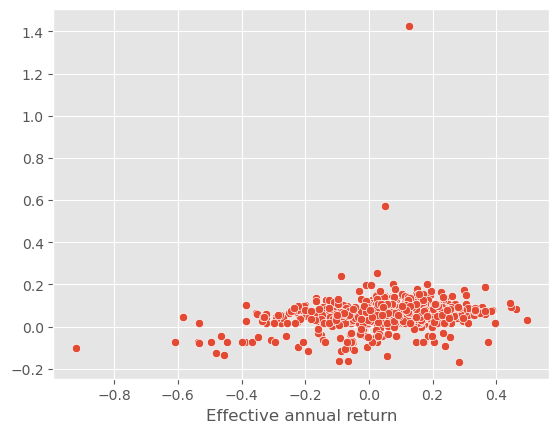

In [71]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

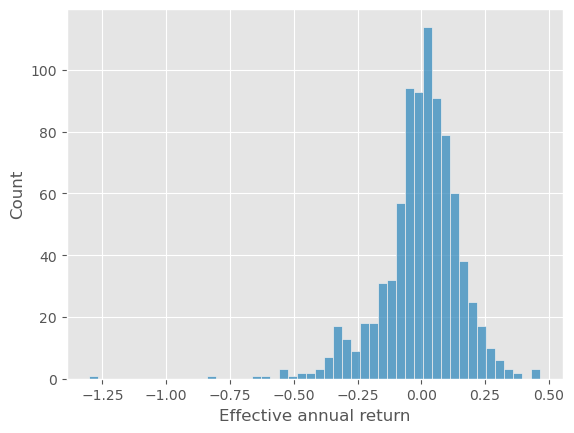

In [72]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11148277656659784
MSE: 0.02458950589391278
RMSE: 0.15681041385671035


**SelectKBest**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [76]:
#Select top 5 features based on mutual info regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k = 5)
selector.fit(scaled_features, y_train)
pd.DataFrame(scaled_features,columns=pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns).columns[selector.get_support()]

Index(['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS', 'IQ_RE',
       'Sector_Finance'],
      dtype='object')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS', 'IQ_RE',
       'Sector_Finance']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [79]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [80]:
coefficients = pd.DataFrame(lm.coef_,['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS', 'IQ_RE',
       'Sector_Finance'],columns=['Coefficient'])

In [81]:
coefficients

,Coefficient
IQ_TOTAL_REV,0.008560
IQ_NI_MARGIN,-0.001746
IQ_ASSET_TURNS,0.030897
IQ_RE,-0.004437
Sector_Finance,0.038373


In [82]:
coefficients['Coefficient'].iplot()

In [83]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

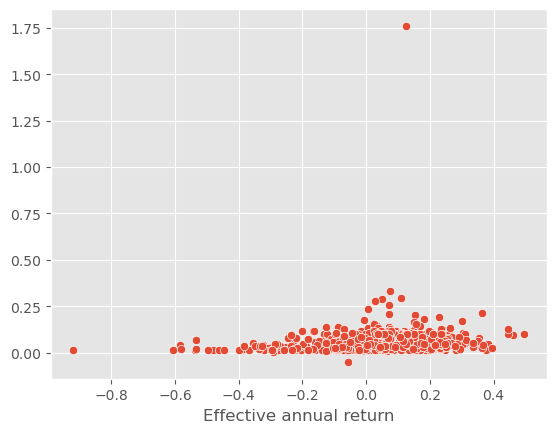

In [84]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

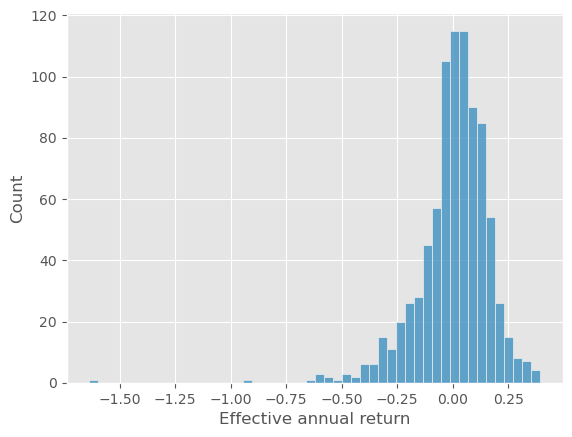

In [85]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11537878967049557
MSE: 0.026882394020925352
RMSE: 0.16395851310903423


**SelectFromModel**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [88]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [89]:
from sklearn.feature_selection import SelectFromModel

sfm_selector = SelectFromModel(estimator=LinearRegression())
sfm_selector.fit(scaled_features, y_train)
pd.DataFrame(scaled_features,columns=pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns).columns[sfm_selector.get_support()]

Index(['IQ_ASSET_TURNS', 'IQ_DAYS_INVENTORY_OUT', 'IQ_EBITDA', 'IQ_CASH_OPER',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Finance', 'Sector_Industrials', 'Sector_Real Estate',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],
      dtype='object')

In [90]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_ASSET_TURNS', 'IQ_DAYS_INVENTORY_OUT', 'IQ_EBITDA', 'IQ_CASH_OPER',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Finance', 'Sector_Industrials', 'Sector_Real Estate',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [91]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [92]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [93]:
coefficients = pd.DataFrame(lm.coef_,['IQ_ASSET_TURNS', 'IQ_DAYS_INVENTORY_OUT', 'IQ_EBITDA', 'IQ_CASH_OPER',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Finance', 'Sector_Industrials', 'Sector_Real Estate',
       'Sector_Technology', 'Sector_Utilities',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],columns=['Coefficient'])

In [94]:
coefficients

,Coefficient
IQ_ASSET_TURNS,0.021943
IQ_DAYS_INVENTORY_OUT,0.013098
IQ_EBITDA,0.045517
IQ_CASH_OPER,-0.042045
Sector_Consumer Discretionary,0.031704
Sector_Consumer Staples,0.010692
Sector_Finance,0.066579
Sector_Industrials,0.017057
Sector_Real Estate,0.024656
Sector_Technology,0.024282


In [95]:
coefficients['Coefficient'].iplot()

In [96]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

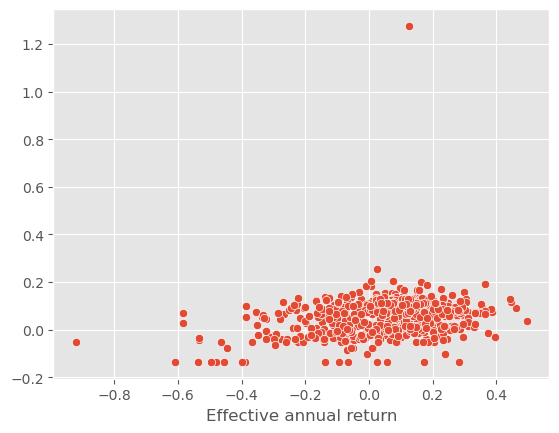

In [97]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

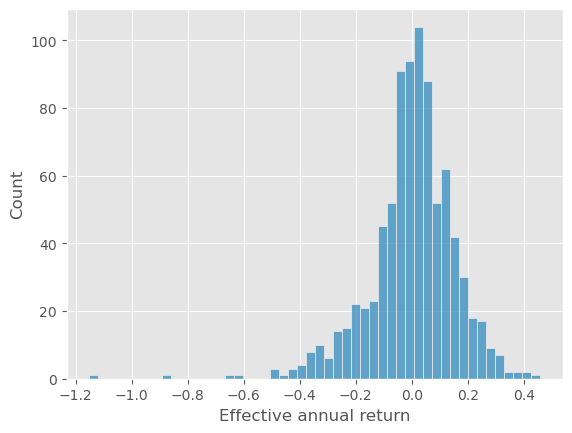

In [98]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.11062020586451662
MSE: 0.02384734632055155
RMSE: 0.1544258602713663


**Sequential Feature Selection (Forward)**

In [100]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [102]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(),direction='forward')
sfs_selector.fit(scaled_features, y_train)
pd.DataFrame(scaled_features,columns=pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns).columns[sfs_selector.get_support()]

Index(['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT', 'IQ_CASH_ST_INVEST',
       'IQ_GW', 'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Health Care',
       'Sector_Industrials', 'Sector_Real Estate', 'Sector_Technology',
       'Sector_Telecommunications', 'Sector_Utilities', 'Sector_nan',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],
      dtype='object')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT', 'IQ_CASH_ST_INVEST',
       'IQ_GW', 'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Health Care',
       'Sector_Industrials', 'Sector_Real Estate', 'Sector_Technology',
       'Sector_Telecommunications', 'Sector_Utilities', 'Sector_nan',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [104]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [105]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [106]:
coefficients = pd.DataFrame(lm.coef_,['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT', 'IQ_CASH_ST_INVEST',
       'IQ_GW', 'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Health Care',
       'Sector_Industrials', 'Sector_Real Estate', 'Sector_Technology',
       'Sector_Telecommunications', 'Sector_Utilities', 'Sector_nan',
       'Country.1_United States', 'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified Going Concern',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],columns=['Coefficient'])

In [107]:
coefficients

,Coefficient
IQ_TOTAL_REV,0.006983
IQ_NI_MARGIN,-0.002648
IQ_ASSET_TURNS,0.021096
IQ_DAYS_INVENTORY_OUT,0.012416
IQ_DAYS_PAYABLE_OUT,-0.002382
IQ_CASH_ST_INVEST,-0.010576
IQ_GW,0.006104
Sector_Consumer Discretionary,0.031812
Sector_Consumer Staples,0.011047
Sector_Energy,-0.006741


In [108]:
coefficients['Coefficient'].iplot()

In [109]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

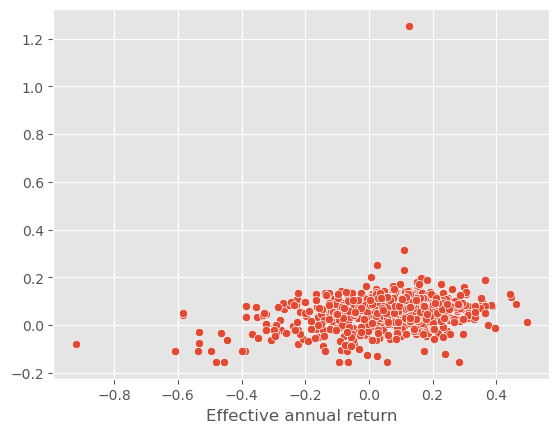

In [110]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

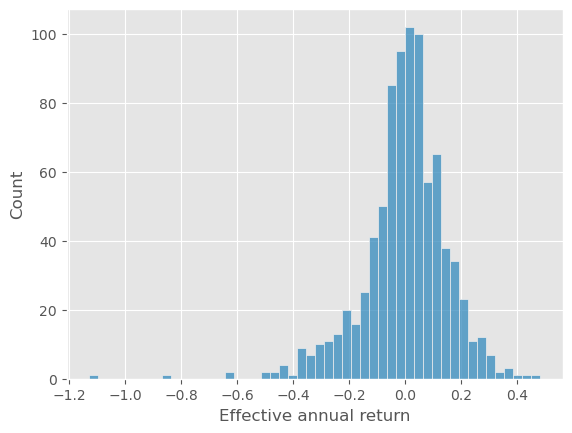

In [111]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10875401853913516
MSE: 0.023304828435721313
RMSE: 0.15265919047250745


**Sequential Feature Selection (Backward)**

In [113]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [114]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [115]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(),direction='backward')
sfs_selector.fit(scaled_features, y_train)
pd.DataFrame(scaled_features,columns=pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).columns).columns[sfs_selector.get_support()]

Index(['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS', 'IQ_DAYS_SALES_OUT',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT', 'IQ_CASH_ST_INVEST',
       'IQ_GW', 'IQ_CONTINGENT_LIABILITIES', 'IQ_NET_CHANGE',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Industrials',
       'Sector_Real Estate', 'Sector_Technology', 'Sector_Telecommunications',
       'Sector_Utilities', 'Country.1_United States',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],
      dtype='object')

In [116]:
X_train, X_test, y_train, y_test = train_test_split(stockdata[['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS', 'IQ_DAYS_SALES_OUT',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT', 'IQ_CASH_ST_INVEST',
       'IQ_GW', 'IQ_CONTINGENT_LIABILITIES', 'IQ_NET_CHANGE',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Industrials',
       'Sector_Real Estate', 'Sector_Technology', 'Sector_Telecommunications',
       'Sector_Utilities', 'Country.1_United States',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language']], 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [117]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [118]:
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [119]:
coefficients = pd.DataFrame(lm.coef_,['IQ_TOTAL_REV', 'IQ_NI_MARGIN', 'IQ_ASSET_TURNS', 'IQ_DAYS_SALES_OUT',
       'IQ_DAYS_INVENTORY_OUT', 'IQ_DAYS_PAYABLE_OUT', 'IQ_CASH_ST_INVEST',
       'IQ_GW', 'IQ_CONTINGENT_LIABILITIES', 'IQ_NET_CHANGE',
       'Sector_Consumer Discretionary', 'Sector_Consumer Staples',
       'Sector_Energy', 'Sector_Finance', 'Sector_Industrials',
       'Sector_Real Estate', 'Sector_Technology', 'Sector_Telecommunications',
       'Sector_Utilities', 'Country.1_United States',
       'IQ_AUDITOR_OPINION_Unqualified',
       'IQ_AUDITOR_OPINION_Unqualified with Additional Language'],columns=['Coefficient'])

In [120]:
coefficients

,Coefficient
IQ_TOTAL_REV,0.007130
IQ_NI_MARGIN,-0.002700
IQ_ASSET_TURNS,0.021369
IQ_DAYS_SALES_OUT,0.006464
IQ_DAYS_INVENTORY_OUT,0.011989
IQ_DAYS_PAYABLE_OUT,-0.004642
IQ_CASH_ST_INVEST,-0.010293
IQ_GW,0.007258
IQ_CONTINGENT_LIABILITIES,-0.002007
IQ_NET_CHANGE,-0.001704


In [121]:
coefficients['Coefficient'].iplot()

In [122]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

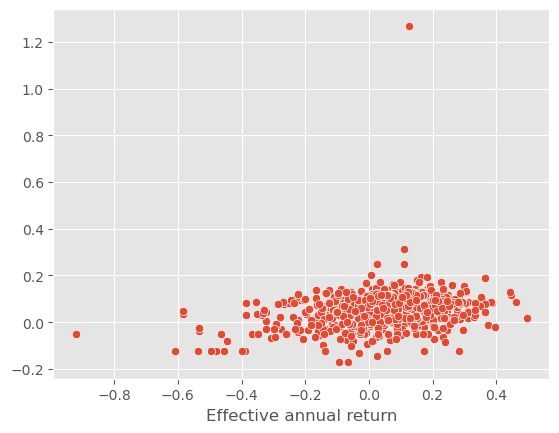

In [123]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

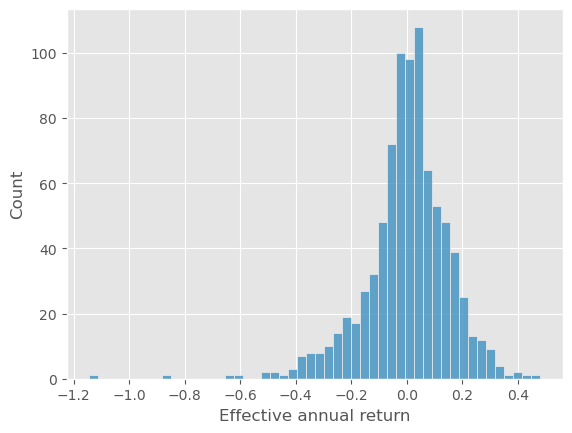

In [124]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [125]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10908927136909655
MSE: 0.023510025459153754
RMSE: 0.1533297931230384


We will also remove the features that contain the most zeros in an attempt to improve model performance. 

In [16]:
(stockdata.iloc[:,8:36]==0).sum()

IQ_TOTAL_REV                       287
IQ_RETURN_ASSETS                   269
IQ_RETURN_EQUITY                   352
IQ_GROSS_MARGIN                    529
IQ_EBITDA_MARGIN                   627
IQ_NI_MARGIN                       397
IQ_ASSET_TURNS                     548
IQ_CURRENT_RATIO                   454
IQ_DAYS_SALES_OUT                  969
IQ_DAYS_INVENTORY_OUT             1423
IQ_DAYS_PAYABLE_OUT                984
IQ_TOTAL_DEBT_EQUITY              1014
IQ_TOTAL_REV_1YR_ANN_GROWTH        357
IQ_NI_1YR_ANN_GROWTH              1520
IQ_CFO_1YR_ANN_GROWTH             1180
IQ_TOTAL_ASSETS_1YR_ANN_GROWTH     268
IQ_EBITDA                          511
IQ_PAYOUT_RATIO                   1828
IQ_CASH_ST_INVEST                  297
IQ_NPPE                            527
IQ_GW                             1345
IQ_RE                              279
IQ_TBV                             232
IQ_NET_DEBT                        246
IQ_CONTINGENT_LIABILITIES         2570
IQ_CASH_OPER             

In [25]:
# The non-dummy variable features with more than 1200 values being 0 are dropped from the model.
X_train, X_test, y_train, y_test = train_test_split(pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).drop(['IQ_CONTINGENT_LIABILITIES','IQ_GW','IQ_PAYOUT_RATIO','IQ_NI_1YR_ANN_GROWTH','IQ_DAYS_INVENTORY_OUT'],axis=1), 
                                                    stockdata['Effective annual return'], test_size=0.30, 
                                                    random_state=101)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features=scaler.transform(X_train)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(scaled_features,y_train)

LinearRegression()

In [28]:
coefficients = pd.DataFrame(lm.coef_,pd.concat([stockdata.iloc[:,8:48],stockdata['Country.1_United States'],stockdata.iloc[:,95:99]],axis=1).drop(['IQ_CONTINGENT_LIABILITIES','IQ_GW','IQ_PAYOUT_RATIO','IQ_NI_1YR_ANN_GROWTH','IQ_DAYS_INVENTORY_OUT'],axis=1).columns,columns=['Coefficient'])

In [29]:
coefficients

,Coefficient
IQ_TOTAL_REV,0.010404
IQ_RETURN_ASSETS,0.001682
IQ_RETURN_EQUITY,-0.002548
IQ_GROSS_MARGIN,0.001876
IQ_EBITDA_MARGIN,0.004167
IQ_NI_MARGIN,-0.004048
IQ_ASSET_TURNS,0.020968
IQ_CURRENT_RATIO,-0.002678
IQ_DAYS_SALES_OUT,0.007342
IQ_DAYS_PAYABLE_OUT,-0.002830


In [30]:
coefficients['Coefficient'].iplot()

In [31]:
predictions = lm.predict(scaler.transform(X_test))

<AxesSubplot:xlabel='Effective annual return'>

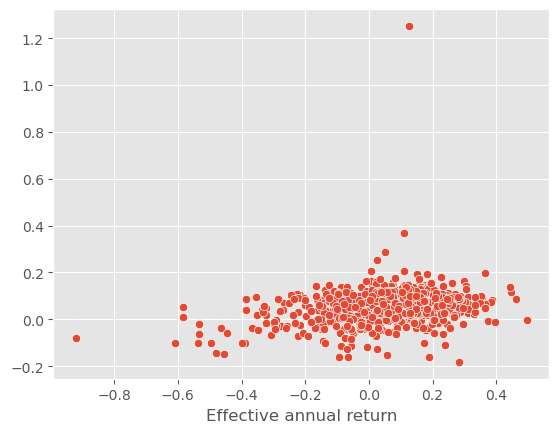

In [32]:
sns.scatterplot(x=y_test,y=predictions)

<AxesSubplot:xlabel='Effective annual return', ylabel='Count'>

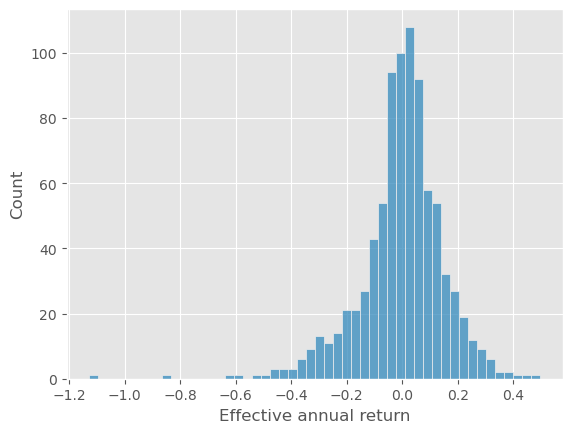

In [33]:
#Residual histogram
sns.histplot((y_test-predictions),bins=50)

In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10850271958758029
MSE: 0.023361952212569054
RMSE: 0.15284617173017143


|**RMSE of linear regression models**||
|------------------------------------||
|With all 91 features including all dummy variables|5220049031.46751|
|With Country.1 dummy variables removed except Country.1_United States (45 features)|0.15362837752110708|
|With recursive feature elimination (22 features)|0.1527913993161023|
|With recursive feature elimination (10 features)|0.15615822900600537|
|With variance threshold feature selection (17 features)|0.15681041385671035|
|With SelectKBest feature selection using mutual info regression (5 features)|0.16395851310903423|
|With SelectFromModel feature selection (13 features)|0.1544258602713663|
|With sequential feature selection (forward) (22 features)|**0.15265919047250745**|
|With sequential feature selection (backward) (22 features)|0.1533297931230384|
|Removing features with most zero values (40 features)|0.15284617173017143|